In this analysis we want to explore how different approaches of investing a huge sum work. While its clear that the direct deposit maximizes the expected returns we want to explore how much we can reduce the risk of an immediate downturn.


In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

from index_data_handler import IndexDataHandler

In [2]:
start_date="19760130"
horizon = 15*12
index_name = "MSCI World"
indexHandler = IndexDataHandler(start_date=start_date,frequency="END_OF_MONTH")
index_codes = {**indexHandler.get_available_indices("Developed")}
index_codes = {index_name:index_codes[index_name]}


def reload_data():
    data = []
    reload=False
    #start_date="20080101"
    for key in index_codes.keys():
        code = index_codes[key]["code"]
        print("reading ",key)
        d = indexHandler.get_historic_stock_data(code, reload=reload)
        d.rename(columns={"level_eod":key}, inplace=True)
        data.append(d)

    df = data[0]
    for i in range(1,len(data)):
        df = df.merge(data[i], how='left',left_index=True,right_index=True)
    return df
df = reload_data()


reading  MSCI World
reading cache\990100_END_OF_MONTH_19760130.csv


In [3]:
display(df)

,MSCI World
date,
1976-01-30,1.000000
1976-02-27,0.993494
1976-03-31,1.006186
1976-04-30,0.999781
1976-05-31,0.984055
...,...
2021-07-30,97.841261
2021-08-31,100.306800
2021-09-30,96.186023


In [4]:
resultDict = []
for i in range(0, len(df)-horizon):
    currentValue = df[index_name][i]
    valueInXyears = df[index_name][i+horizon]
    valueIn6Months = df[index_name][i+6]
    
    one_time_deposit_gain = valueInXyears / currentValue
    splitted_deposit_gain = 0.5*(valueInXyears / currentValue) + 0.5 * (valueInXyears / valueIn6Months)
    resultDict.append({"OneTime-Gain":one_time_deposit_gain,"Splitted-Gain":splitted_deposit_gain})
    
results = pd.DataFrame(resultDict)
results['Delta-Gains'] = results["OneTime-Gain"]-results["Splitted-Gain"]
results['Delta Bigger 0'] = results["Delta-Gains"] >0

NumberOfTrues = results['Delta Bigger 0'].value_counts()[1]
NumberOfFalses = results['Delta Bigger 0'].value_counts()[0]

print(NumberOfTrues)
print("Fraction of Times One Time Deposit was better: ",NumberOfTrues/len(results))
display(results)
results.describe()

278
Fraction of Times One Time Deposit was better:  0.7493261455525606


,OneTime-Gain,Splitted-Gain,Delta-Gains,Delta Bigger 0
0,7.611938,7.586321,0.025617,True
1,8.372409,8.322753,0.049656,True
2,8.024452,7.990164,0.034288,True
3,8.140350,8.221151,-0.080800,False
4,8.459230,8.487541,-0.028311,False
...,...,...,...,...
366,3.384790,3.176212,0.208578,True
367,3.380603,3.218833,0.161770,True
368,3.202612,3.040094,0.162518,True
369,3.264398,3.087796,0.176602,True


,OneTime-Gain,Splitted-Gain,Delta-Gains
count,371.000000,371.000000,371.000000
mean,4.643272,4.499612,0.143660
std,2.750561,2.632142,0.269367
min,1.618020,1.589644,-0.558583
25%,2.447565,2.399109,0.000462
50%,3.311115,3.214388,0.099274
75%,7.763576,7.539043,0.216558
max,11.735923,10.378293,1.357630


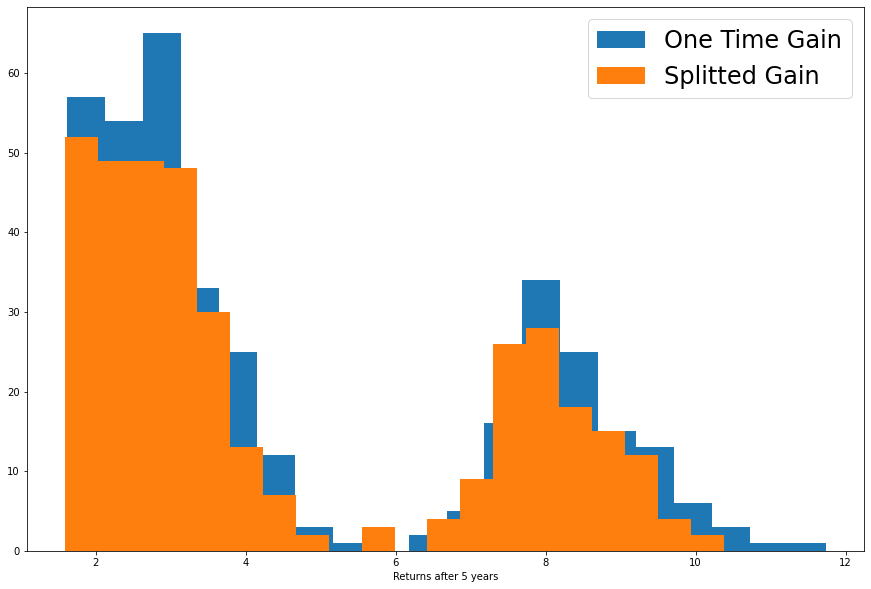

In [5]:

fig = plt.figure(figsize=(15, 10))
fig.set_facecolor("white")
plt.xlabel("Returns after 5 years")
plt.hist(results['OneTime-Gain'],bins=20, label="One Time Gain")
plt.hist(results['Splitted-Gain'],bins=20, label="Splitted Gain")
plt.legend(prop={'size':24})
plt.show()

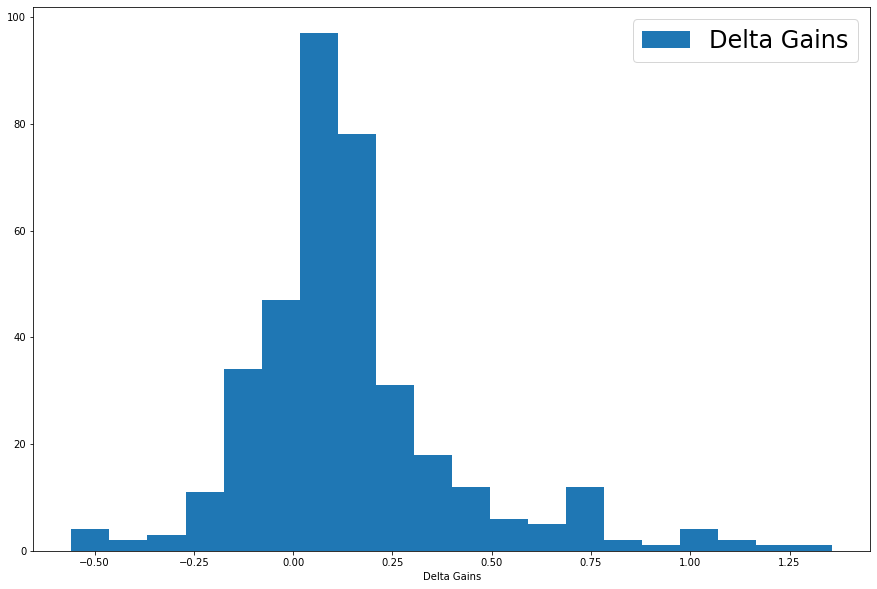

In [6]:
fig = plt.figure(figsize=(15, 10))
fig.set_facecolor("white")

plt.xlabel("Delta Gains")
plt.hist(results['Delta-Gains'],bins=20, label="Delta Gains")
plt.legend(prop={'size':24})
plt.show()